In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, exploratory_data_analysis
from ipywidgets import interact

In [2]:
##
# Setup visualization settings:
#
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

In [3]:
##
# Load and group data according to labels and types:
#
categories = ['mono-functional', 'mono-marginally-defective', 'mono-defective', 
    'poly-functional','poly-marginally-defective', 'poly-defective']
    
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv', True)

mono_functional = data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.0, 'mono')
mono_defective = data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 1.0, 'mono')
mono_marginally_defective = np.concatenate(\
    (data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.3333333333333333, 'mono'), 
    data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.6666666666666666, 'mono')), axis = 0)

poly_functional = data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.0, 'poly')
poly_defective = data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 1.0, 'poly')
poly_marginally_defective = np.concatenate(\
    (data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.3333333333333333, 'poly'), 
    data_handling.group_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.6666666666666666, 'poly')), axis = 0)

print([mono_functional.shape, mono_marginally_defective.shape, mono_defective.shape])
print([poly_functional.shape, poly_marginally_defective.shape, poly_defective.shape])

[(588, 300, 300), (173, 300, 300), (313, 300, 300)]
[(920, 300, 300), (228, 300, 300), (402, 300, 300)]


In [4]:
@interact(i = (0, mono_functional.shape[0] - 1), 
    j = (0, mono_marginally_defective.shape[0] - 1), 
    k = (0, mono_defective.shape[0] - 1))
def display_image(i = 0, j = 0, k = 0):
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(mono_functional[i], cmap = 'gray')
    axs[0].set_title(categories[0])
    axs[0].set_xlabel('Width [px]')
    axs[0].set_ylabel('Width [px]')

    axs[1].imshow(mono_marginally_defective[j], cmap = 'gray')
    axs[1].set_title(categories[1])
    axs[1].set_xlabel('Width [px]')
    axs[1].set_ylabel('Width [px]')

    axs[2].imshow(mono_defective[k], cmap = 'gray')
    axs[2].set_title(categories[2])
    axs[2].set_xlabel('Width [px]')
    axs[2].set_ylabel('Width [px]')
    plt.tight_layout()
    return None

@interact(i = (0, poly_functional.shape[0] - 1), 
    j = (0, poly_marginally_defective.shape[0] - 1), 
    k = (0, poly_defective.shape[0] - 1))
def display_image(i = 0, j = 0, k = 0):
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(poly_functional[i], cmap = 'gray')
    axs[0].set_title(categories[3])
    axs[0].set_xlabel('Width [px]')
    axs[0].set_ylabel('Width [px]')

    axs[1].imshow(poly_marginally_defective[j], cmap = 'gray')
    axs[1].set_title(categories[4])
    axs[1].set_xlabel('Width [px]')
    axs[1].set_ylabel('Width [px]')

    axs[2].imshow(poly_defective[k], cmap = 'gray')
    axs[2].set_title(categories[5])
    axs[2].set_xlabel('Width [px]')
    axs[2].set_ylabel('Width [px]')
    plt.tight_layout()
    return None

interactive(children=(IntSlider(value=0, description='i', max=587), IntSlider(value=0, description='j', max=17…

interactive(children=(IntSlider(value=0, description='i', max=919), IntSlider(value=0, description='j', max=22…

In [5]:
##
# Compute statistical parameters (mean, median, std, max, min, mode):
#
mono_functional_stats = exploratory_data_analysis.compute_statistical_parameters(mono_functional)
mono_marginally_defective_stats = exploratory_data_analysis.compute_statistical_parameters(mono_marginally_defective)
mono_defective_stats = exploratory_data_analysis.compute_statistical_parameters(mono_defective)

poly_functional_stats = exploratory_data_analysis.compute_statistical_parameters(poly_functional)
poly_marginally_defective_stats = exploratory_data_analysis.compute_statistical_parameters(poly_marginally_defective)
poly_defective_stats = exploratory_data_analysis.compute_statistical_parameters(poly_defective)

parameters = [mono_functional_stats, mono_marginally_defective_stats, mono_defective_stats,
    poly_functional_stats, poly_marginally_defective_stats, poly_defective_stats]

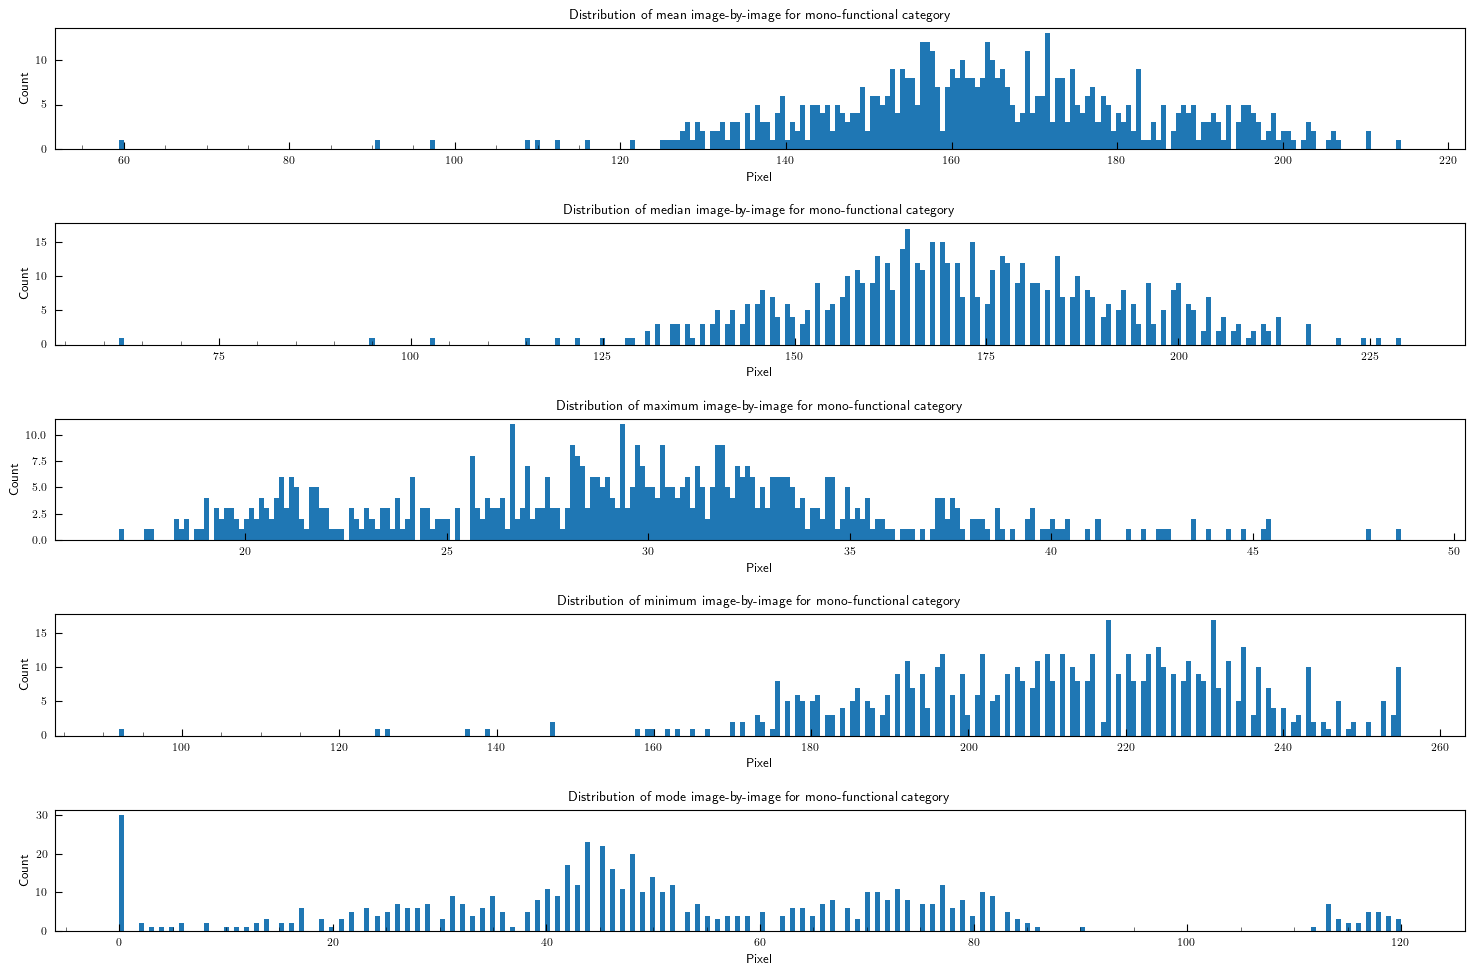

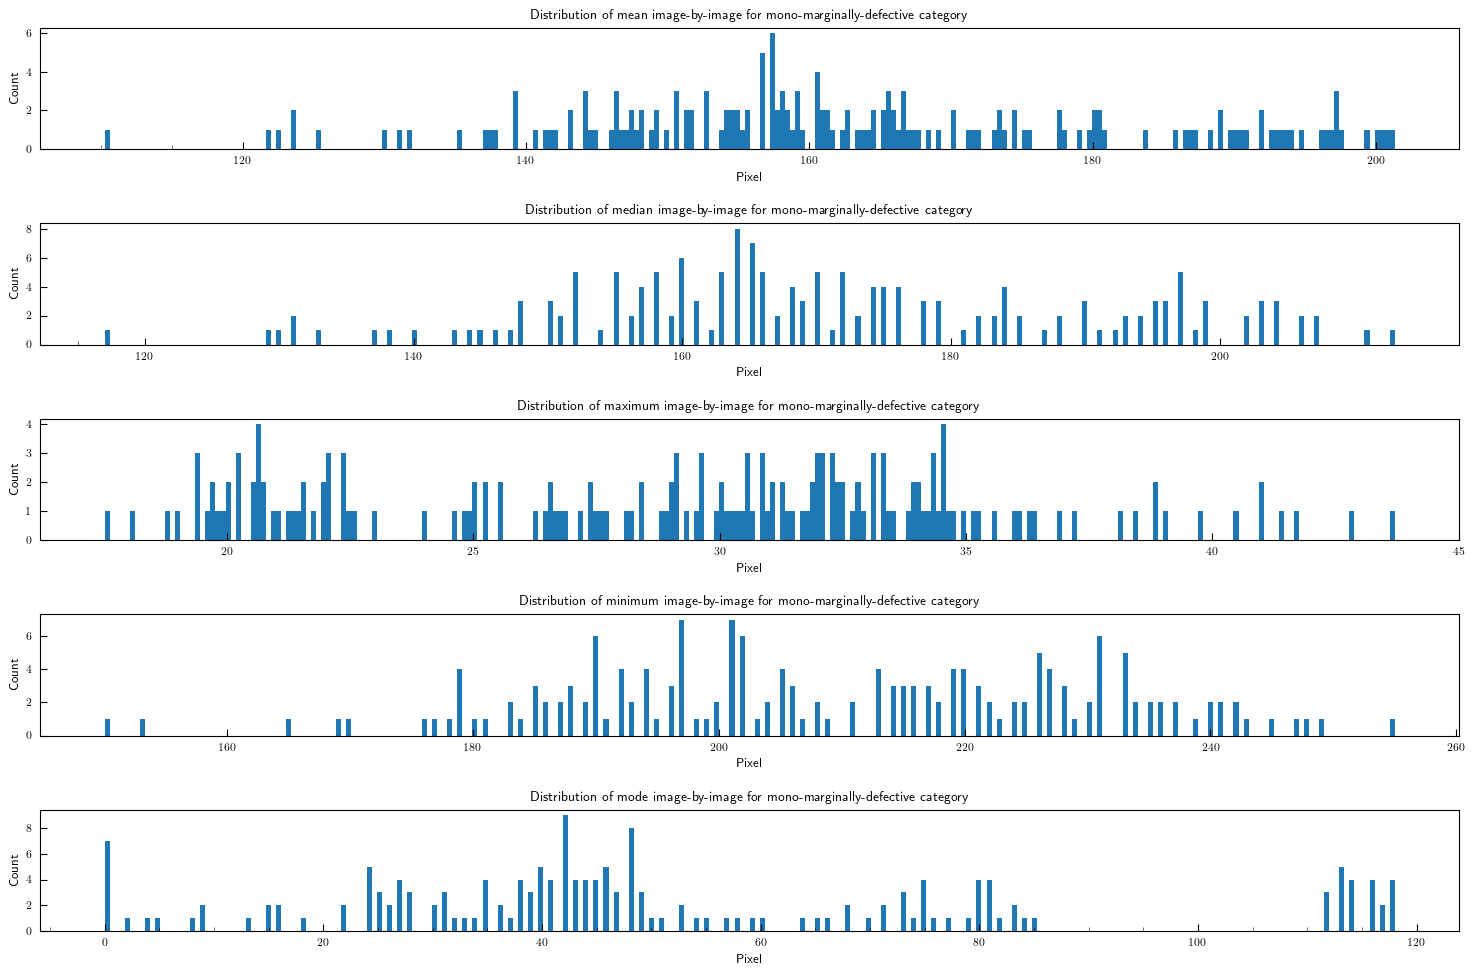

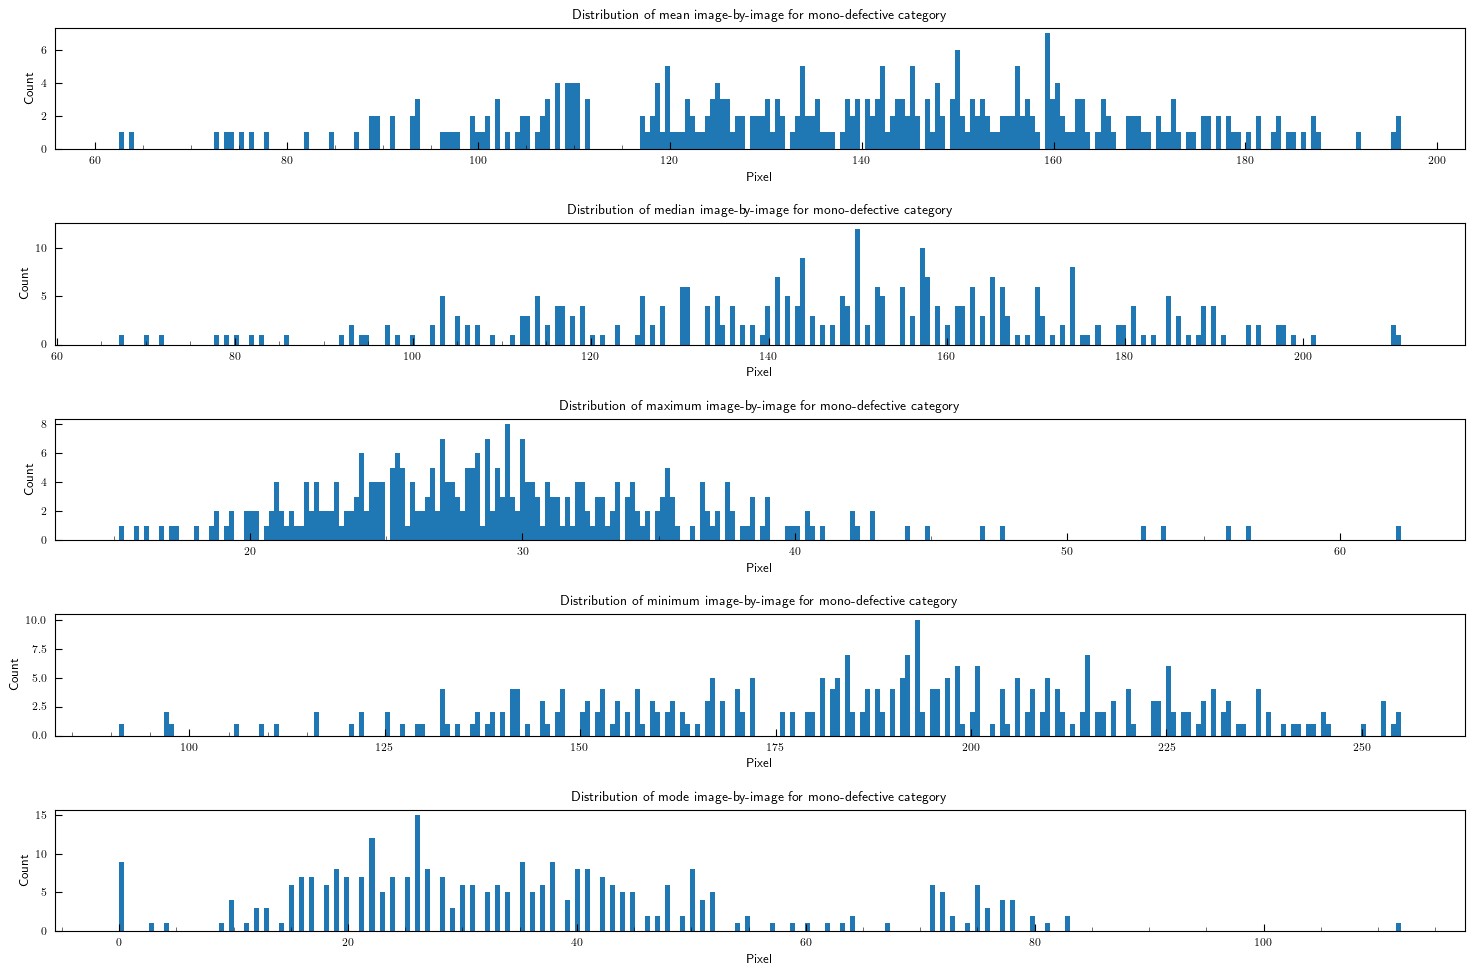

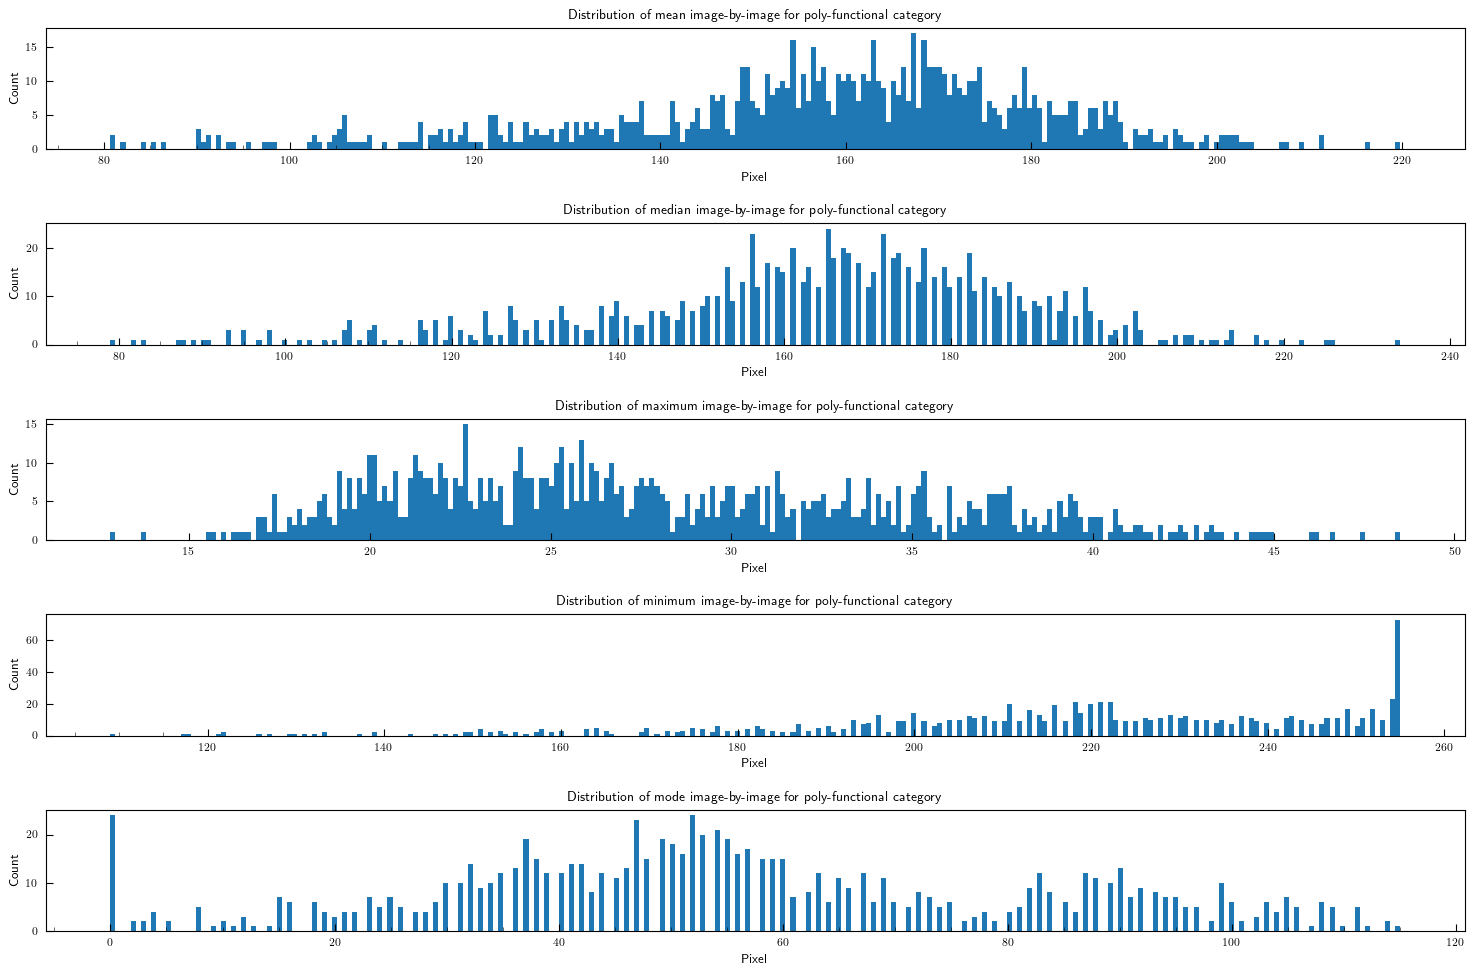

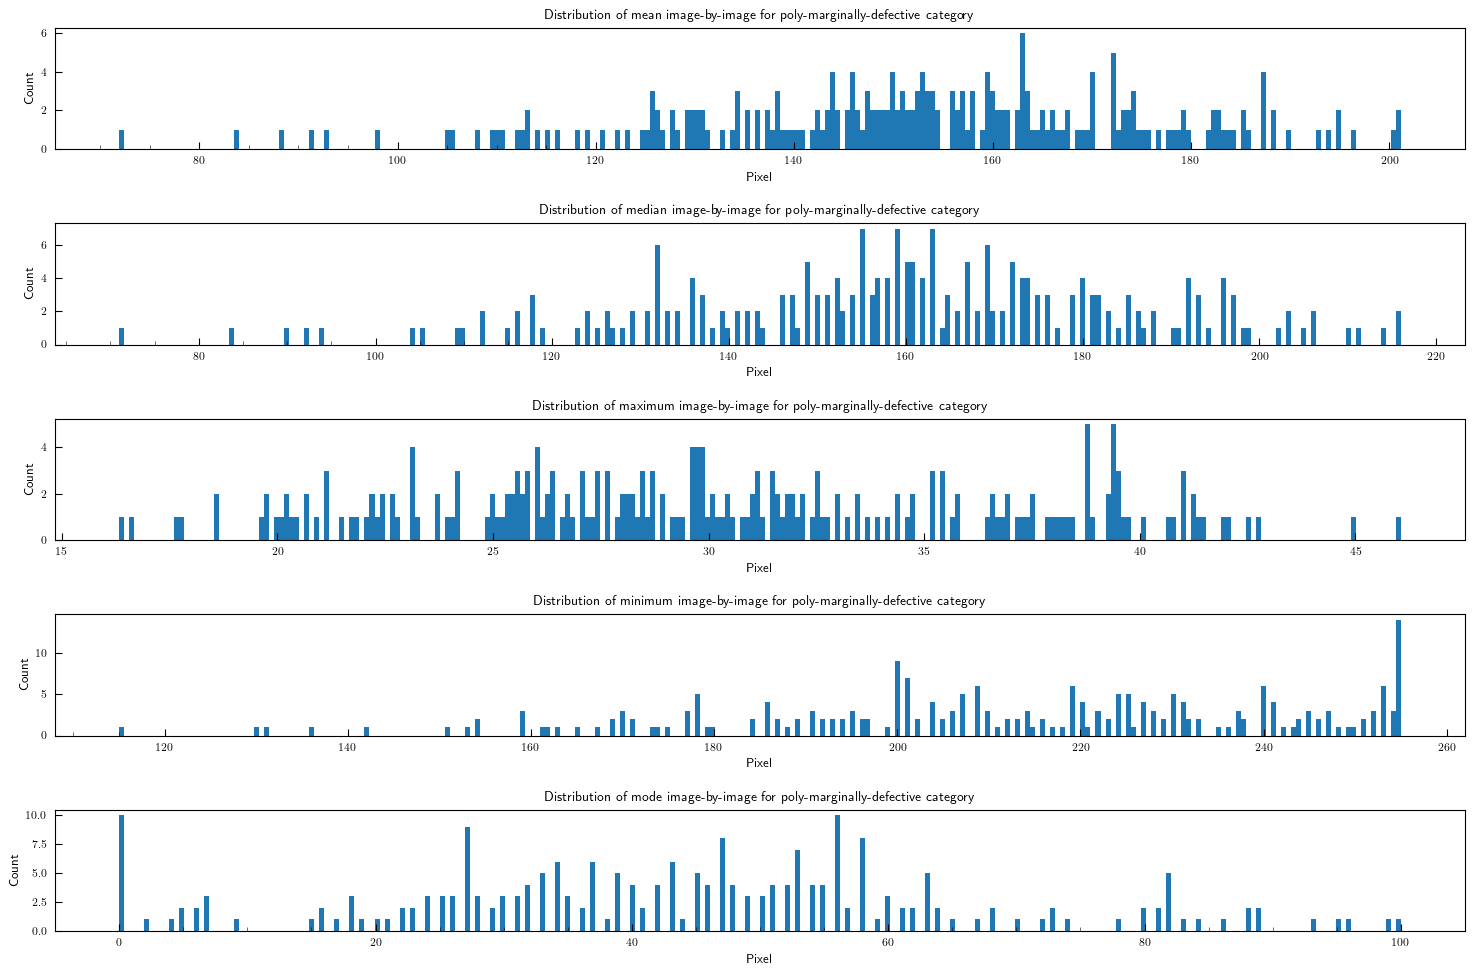

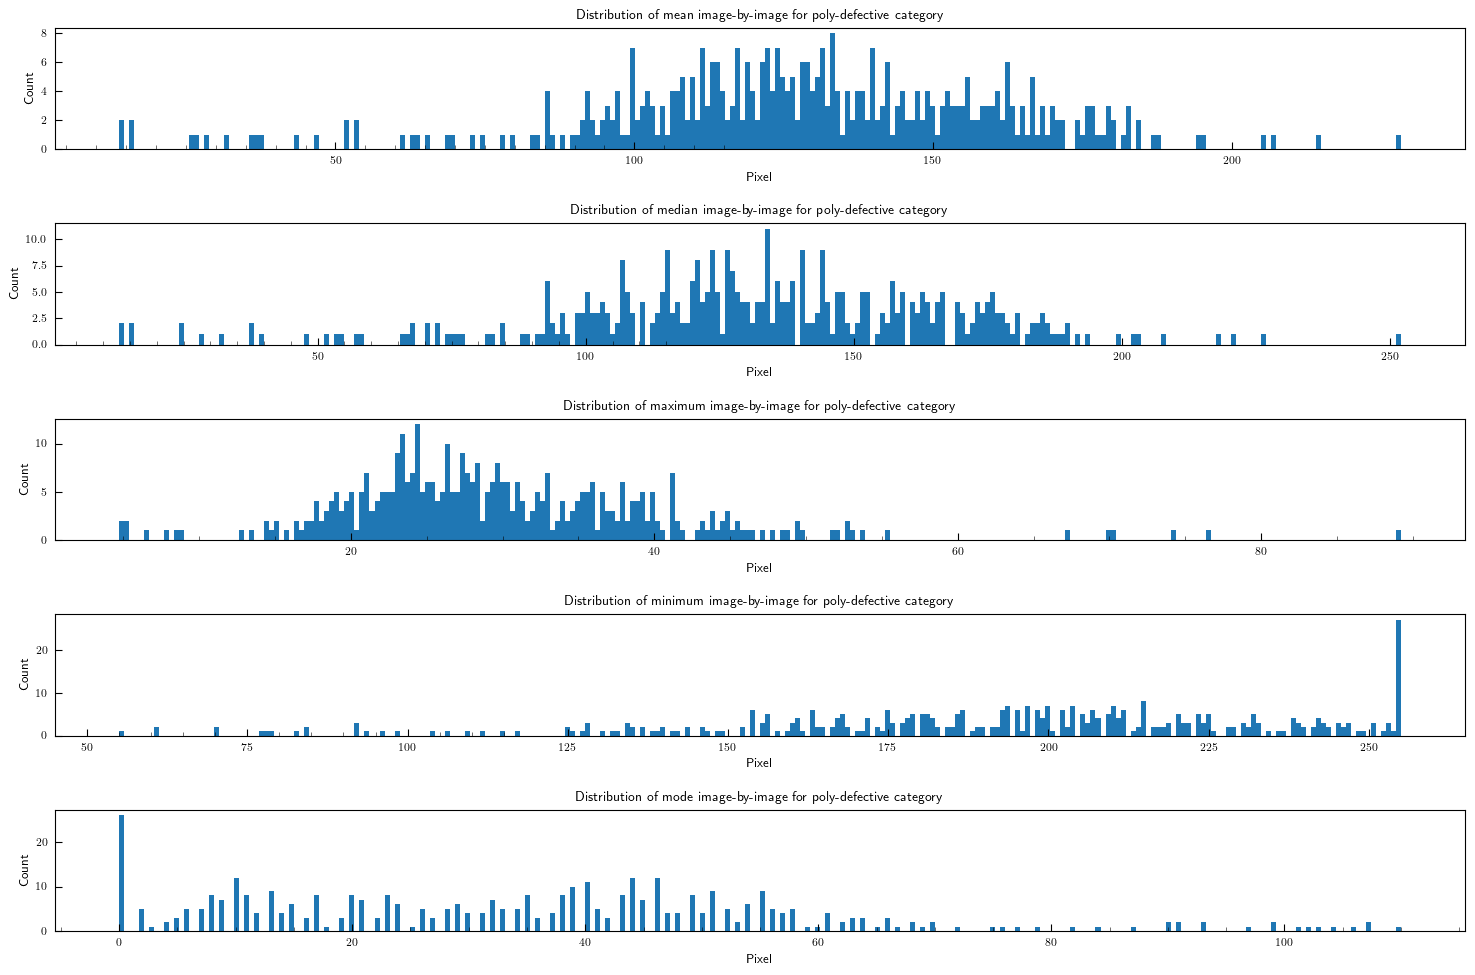

In [6]:
##
# Visualize the distribution of these statistical parameters:
#
titles = ['mean', 'median', 'maximum', 'minimum', 'mode']

for idx, category in enumerate(categories):
    fig, axs = plt.subplots(5, 1, figsize = (15,10))
    for jdx in range(5):
        axs[jdx].hist(parameters[idx][jdx], bins = 256)
        axs[jdx].set_title(f'Distribution of {titles[jdx]} image-by-image for {category} category')
        axs[jdx].set_xlabel('Pixel')
        axs[jdx].set_ylabel('Count')
        axs[jdx].xaxis.set_minor_locator(minor_locator)
        plt.tight_layout()


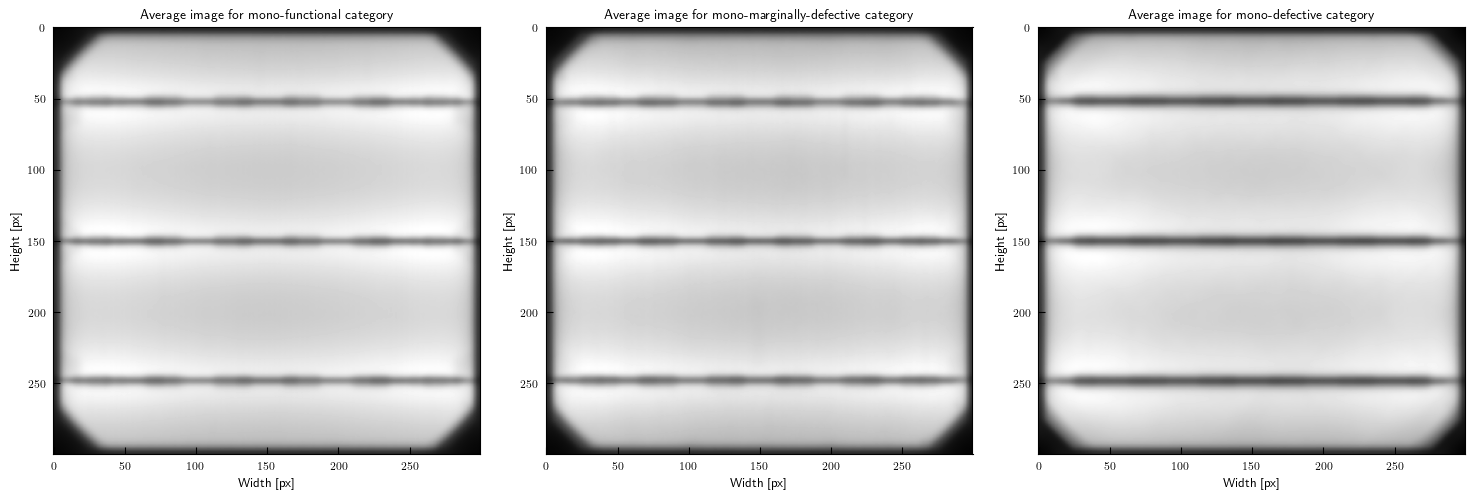

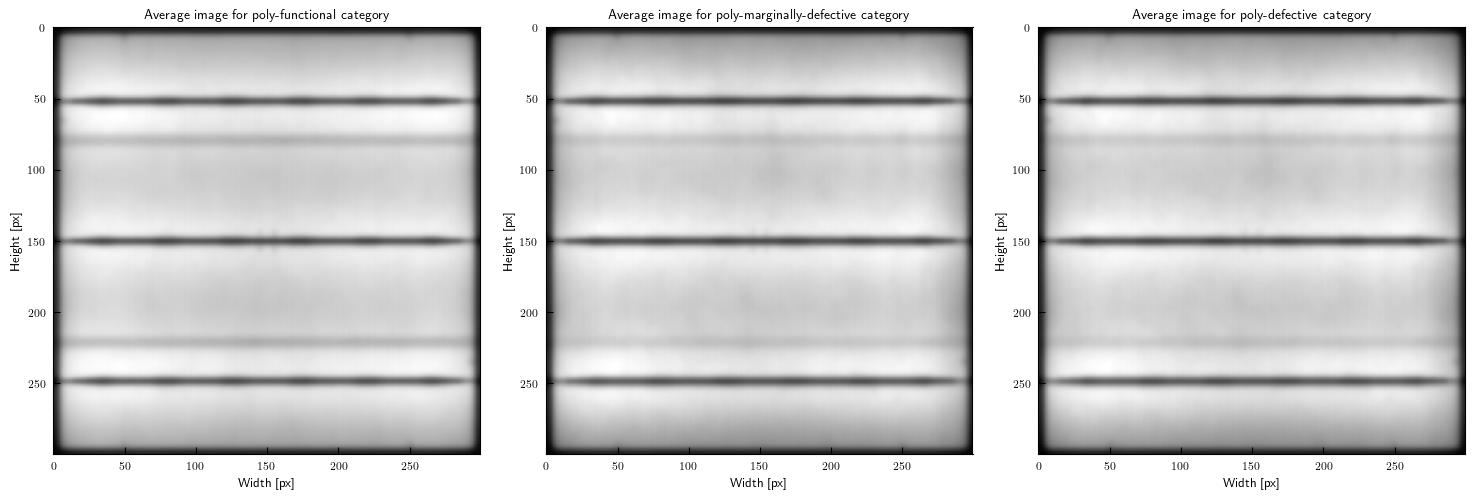

In [7]:
##
# Computer and visualize average image:
#
mono_functional_average = exploratory_data_analysis.compute_average_image(mono_functional)
mono_marginally_defective_average = exploratory_data_analysis.compute_average_image(mono_marginally_defective)
mono_defective_average = exploratory_data_analysis.compute_average_image(mono_defective)

poly_functional_average = exploratory_data_analysis.compute_average_image(poly_functional)
poly_marginally_defective_average = exploratory_data_analysis.compute_average_image(poly_marginally_defective)
poly_defective_average = exploratory_data_analysis.compute_average_image(poly_defective)

average_images = [mono_functional_average, mono_marginally_defective_average, mono_defective_average, 
    poly_functional_average, poly_marginally_defective_average, poly_marginally_defective_average]

fig, axs = plt.subplots(1, 3, figsize = (15,10))
for jdx in range(3):
    axs[jdx].imshow(average_images[jdx], cmap = 'gray')
    axs[jdx].set_title(f'Average image for {categories[jdx]} category')
    axs[jdx].set_xlabel('Width [px]')
    axs[jdx].set_ylabel('Height [px]')
    plt.tight_layout()

fig, axs = plt.subplots(1, 3, figsize = (15,10))
for jdx in range(3):
    axs[jdx].imshow(average_images[jdx + 3], cmap = 'gray')
    axs[jdx].set_title(f'Average image for {categories[jdx + 3]} category')
    axs[jdx].set_xlabel('Width [px]')
    axs[jdx].set_ylabel('Height [px]')
    plt.tight_layout()

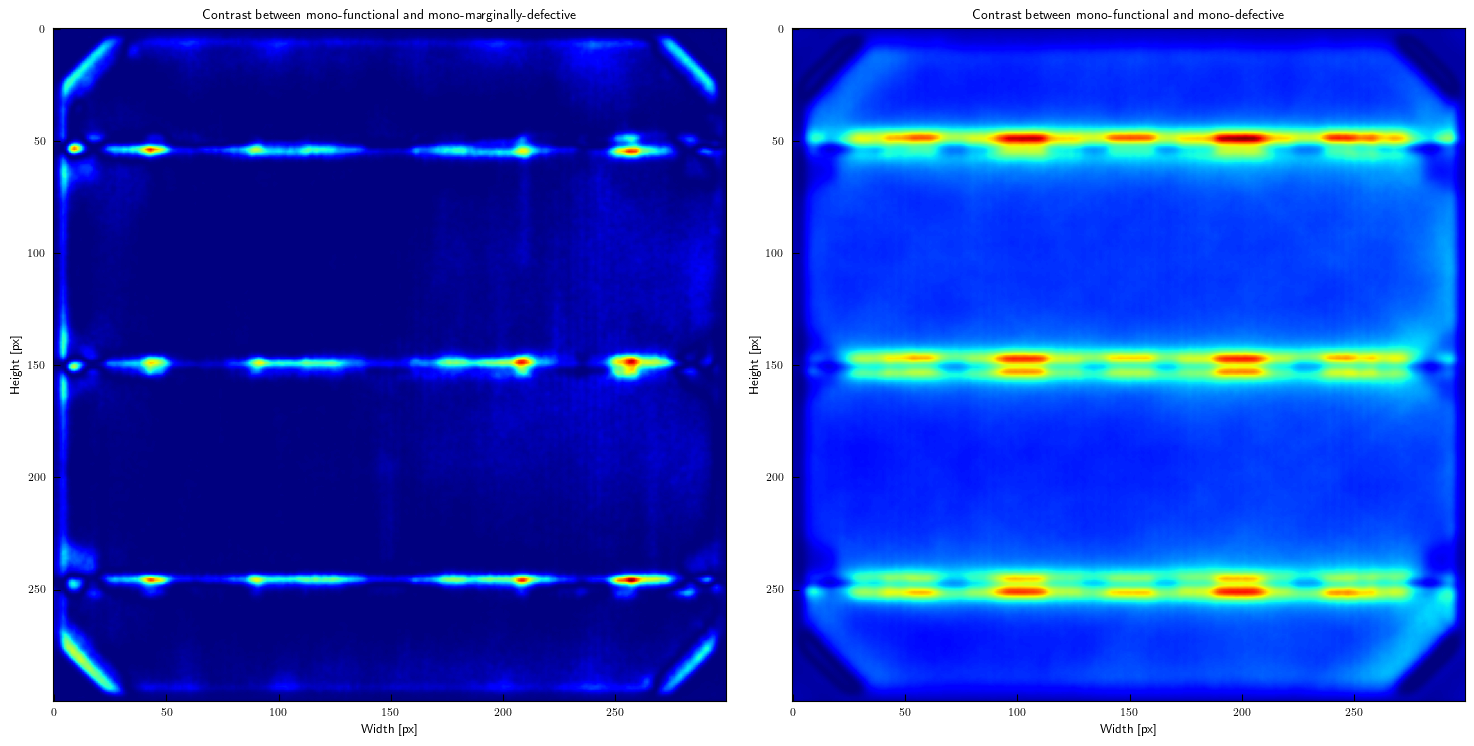

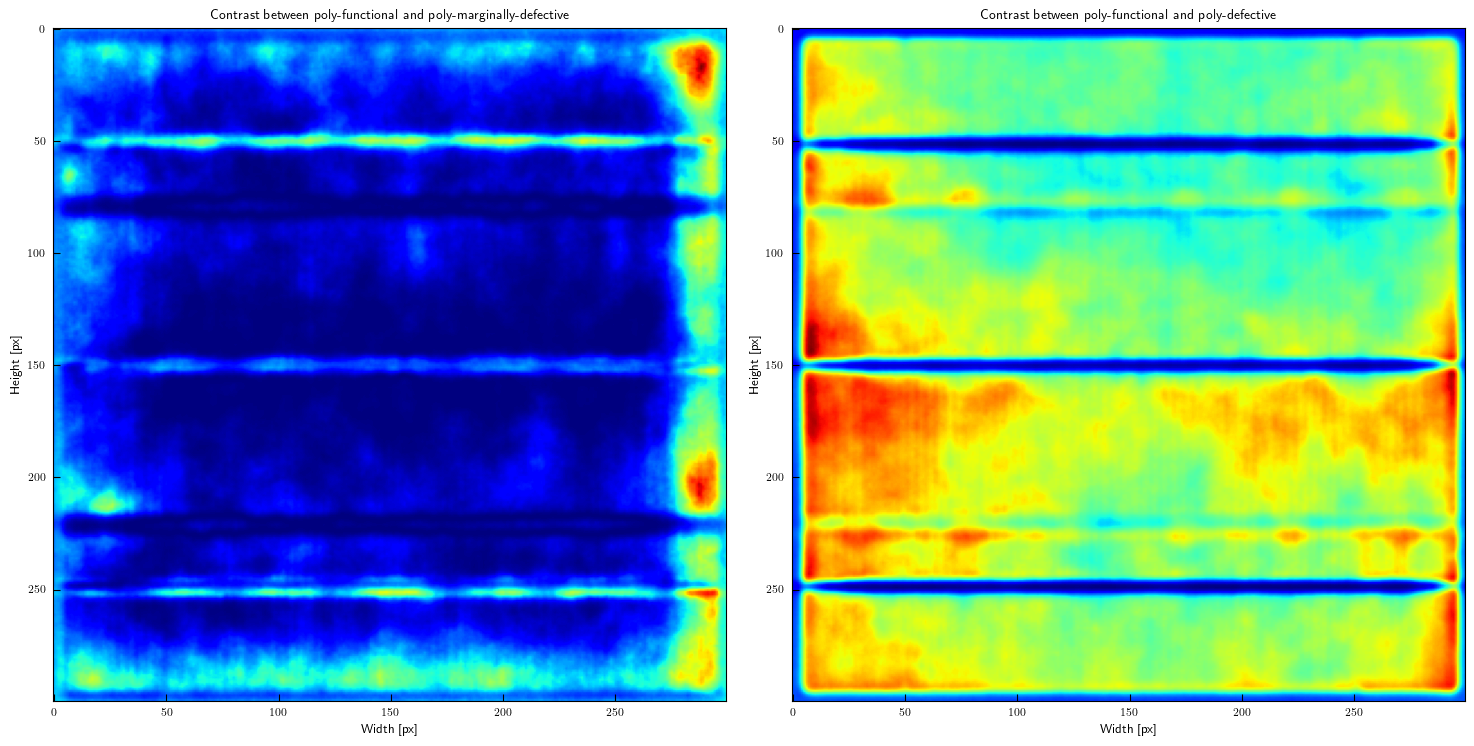

In [8]:
##
# Computer and visualize image contrast:
#
mono_contrast = [np.subtract(mono_functional_average, mono_marginally_defective_average) ** 2, 
    np.subtract(mono_functional_average, mono_defective_average) ** 2]
poly_contrast = [np.subtract(poly_functional_average, poly_marginally_defective_average) ** 2, 
    np.subtract(poly_functional_average, poly_defective_average) ** 2]

fig, axs = plt.subplots(1, 2, figsize = (15,10))
axs[0].imshow(mono_contrast[0], cmap = 'jet')
axs[0].set_title(f'Contrast between {categories[0]} and {categories[1]}')
axs[0].set_xlabel('Width [px]')
axs[0].set_ylabel('Height [px]')
axs[1].imshow(mono_contrast[1], cmap = 'jet')
axs[1].set_title(f'Contrast between {categories[0]} and {categories[2]}')
axs[1].set_xlabel('Width [px]')
axs[1].set_ylabel('Height [px]')
plt.tight_layout()

fig, axs = plt.subplots(1, 2, figsize = (15,10))
axs[0].imshow(poly_contrast[0], cmap = 'jet')
axs[0].set_title(f'Contrast between {categories[3]} and {categories[4]}')
axs[0].set_xlabel('Width [px]')
axs[0].set_ylabel('Height [px]')
axs[1].imshow(poly_contrast[1], cmap = 'jet')
axs[1].set_title(f'Contrast between {categories[3]} and {categories[5]}')
axs[1].set_xlabel('Width [px]')
axs[1].set_ylabel('Height [px]')
plt.tight_layout()

In [9]:
##
# Compute and visualize eigenimages:
#
mono_functional_eigens = exploratory_data_analysis.compute_eigenimages(mono_functional, 0.8)
mono_marginally_defective_eigens = \
    exploratory_data_analysis.compute_eigenimages(mono_marginally_defective, 0.8)
mono_defective_eigens = exploratory_data_analysis.compute_eigenimages(mono_defective, 0.8)

interactive(children=(IntSlider(value=0, description='i', max=587), IntSlider(value=0, description='j', max=17…

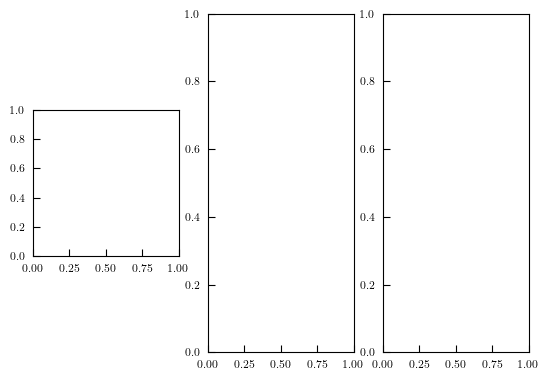

In [10]:
@interact(i = (0, mono_functional_eigens.shape[0] - 1), 
    j = (0, mono_marginally_defective_eigens.shape[0] - 1), 
    k = (0, mono_defective_eigens.shape[0] - 1))
def display_image(i = 0, j = 0, k = 0):
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(mono_functional_eigens[i], cmap = 'gray')
    axs[0].set_title(f'Eigenimage of {categories[0]}')
    axs[0].set_xlabel('Width [px]')
    axs[0].set_ylabel('Width [px]')

    axs[1].imshow(mono_marginally_defective_eigens[j], cmap = 'gray')
    axs[1].set_title(f'Eigenimage of {categories[1]}')
    axs[1].set_xlabel('Width [px]')
    axs[1].set_ylabel('Width [px]')

    axs[2].imshow(mono_defective_eigens[k], cmap = 'gray')
    axs[2].set_title(f'Eigenimage of {categories[2]}')
    axs[2].set_xlabel('Width [px]')
    axs[2].set_ylabel('Width [px]')
    plt.tight_layout()
    return None

## Image embedding with fiftyone

In [ ]:
model = foz.load_zoo_model("resnet50-imagenet-torch")
print(model.has_embeddings)

In [ ]:
dataset = fo.load_dataset('dataset')
dataset.delete()

In [ ]:
dataset = fo.Dataset('dataset')
for im_path in image_list:
    im_name = str('images/' + im_path.name)
    sample = fo.Sample(filepath=str(im_path))
    im_data = metadata[metadata['im_path'] == im_name]
    sample['label'] = fo.Classification(label=im_data['class'].values[0])
    dataset.add_sample(sample)

#dataset = fo.load_dataset('dataset')
dataset.persistent = True
dataset

In [ ]:
embeddings = dataset.compute_embeddings(model)
results = fob.compute_visualization(
    dataset,
    embeddings=embeddings,
    num_dims=2,
    brain_key="image_embeddings",
    verbose=True,
    seed=51,
    method='umap'
)

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
labels = metadata['class']
plot = results.visualize(labels=labels)
session.plots.attach(plot)
plot.show(height=720)

### Embedding without LCB and MCB

In [ ]:
metadata = pd.read_csv(labels_path, delim_whitespace=True, header=None)
metadata.columns = ['im_path', 'quality', 'panel type']
filtered_images = metadata[(metadata['quality'] > 0) & (metadata['quality'] < 1)]['im_path']
metadata = metadata[(metadata['quality'] == 0) | (metadata['quality'] == 1)].reset_index(drop=True)
metadata.quality = metadata["quality"].map(lambda value: 'bad' if value == 1 else 'good')
metadata['class'] = metadata[['panel type', 'quality']].agg(' '.join, axis=1)
metadata

In [ ]:
dataset = fo.load_dataset('filtered')
dataset.delete()

In [ ]:
dataset = fo.Dataset('filtered')
for im_path in image_list:
    im_name = str('images/' + im_path.name)
    if im_name not in list(filtered_images):
        sample = fo.Sample(filepath=str(im_path))
        im_data = metadata[metadata['im_path'] == im_name]
        sample['label'] = fo.Classification(label=im_data['class'].values[0])
        dataset.add_sample(sample)

#dataset = fo.load_dataset('dataset')
dataset.persistent = True
dataset

In [ ]:
embeddings = dataset.compute_embeddings(model)
results = fob.compute_visualization(
    dataset,
    embeddings=embeddings,
    num_dims=2,
    brain_key="image_embeddings",
    verbose=True,
    seed=51,
    method='umap'
)

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
labels = metadata['class']
plot = results.visualize(labels=labels)
session.plots.attach(plot)
plot.show(height=720)